In [1]:
from src.collector.collect import cartpole_collect
from src.frame.run_frame import DQN_frame

In [2]:
frame = DQN_frame()
frame.build()

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


In [3]:
# frame.compute_avg_return(frame.train_env, frame.random_policy)

In [4]:
# frame.collect_data(frame.train_env, frame.random_policy, frame.replay_buffer, frame.initial_collect_steps)

In [5]:
frame.train()

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))
step = 200: loss = 16.26792335510254
step = 400: loss = 6.952099800109863
step = 600: loss = 10.68202018737793
step = 800: loss = 5.065757751464844
step = 1000: loss = 17.330732345581055
step = 1000: Average Return = 15.0
step = 1200: loss = 17.436050415039062
step = 1400: loss = 12.365177154541016
step = 1600: loss = 5.470739364624023
step = 1800: loss = 2.023190498352051
step = 2000: loss = 3.0162436962127686
step = 2000: Average Return = 26.5
step = 2200: loss = 39.639678955078125
step = 2400: loss = 28.369483947753906
step = 2600: loss = 21.227161407470703
step = 2800: loss = 3.6502609252929688
step = 3000: loss = 24.483463287353516
step = 3000: Average Return = 86.4000015258789
step = 3200: loss = 14.511524200439453
step = 3400: loss = 5.3549695014953

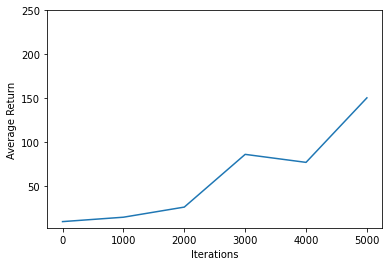

In [6]:
frame.plot()

In [7]:
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay

display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

In [8]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

In [13]:
def create_policy_eval_video(policy, filename, num_episodes=5, fps=30):
  filename = filename + ".mp4"
  with imageio.get_writer(filename, fps=fps) as video:
    for _ in range(num_episodes):
      time_step = frame.eval_env.reset()
      video.append_data(frame.eval_py_env.render())
      while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = frame.eval_env.step(action_step.action)
        video.append_data(frame.eval_py_env.render())
  return embed_mp4(filename)




create_policy_eval_video(frame.agent.policy, "trained-agent")